In [1]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [2]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [3]:
gensim.__version__

#o/p:-4.2.0

'4.3.3'

In [4]:
np.random.seed(42)

In [5]:
!pip install nltk
!pip install gensim

In [6]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [7]:
wv = api.load('glove-twitter-100')
type(wv)

[==================================================] 100.0% 387.1/387.1MB downloaded


gensim.models.keyedvectors.KeyedVectors

In [8]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.stem import PorterStemmer # for stemming
from nltk.stem import WordNetLemmatizer # for lemmatization
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split , cross_val_score,KFold
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import warnings
!pip install imblearn
import imblearn
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [9]:
# Reading Training Data
nRowsRead = None
X_train_file = pd.read_csv('Train-Augmentation.csv', delimiter=',', nrows=nRowsRead, encoding="ISO-8859-1")
nRow, nCol = X_train_file.shape
print(f'Training Data: {nRow} rows, {nCol} columns')

# Reading Test Data
X_test_file = pd.read_csv('Test.csv', delimiter=',', nrows=nRowsRead, encoding="ISO-8859-1")
nRow, nCol = X_test_file.shape
print(f'Test Data: {nRow} rows, {nCol} columns')

Training Data: 8577 rows, 2 columns
Test Data: 7931 rows, 2 columns


In [10]:
# Tokenizer and Vectorization
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    return wv_res / ctr

In [11]:
def spacy_tokenizer(sentence):
    doc = nlp(sentence)
    mytokens = [
        word.lemma_.lower().strip()
        for word in doc
        if word.text.lower() not in stop_words and word.text not in punctuations
    ]
    return mytokens

In [12]:
# Preprocessing Data
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
punctuations = string.punctuation


X_train_file['tokens'] = X_train_file['tweet'].apply(spacy_tokenizer)
X_test_file['tokens'] = X_test_file['tweet'].apply(spacy_tokenizer)
X_train_file['vec'] = X_train_file['tokens'].apply(sent_vec)
X_test_file['vec'] = X_test_file['tokens'].apply(sent_vec)


In [13]:
# Preparing Training and Test Data for Model
A = X_train_file['vec'].to_list()  # Training data features
B = X_train_file['label']  # Training data labels
C = X_test_file['vec'].to_list()  # Test data features
D = X_test_file['label']  # Test data labels

Class=1, n=2859 (33.333%)
Class=2, n=2859 (33.333%)
Class=0, n=2859 (33.333%)


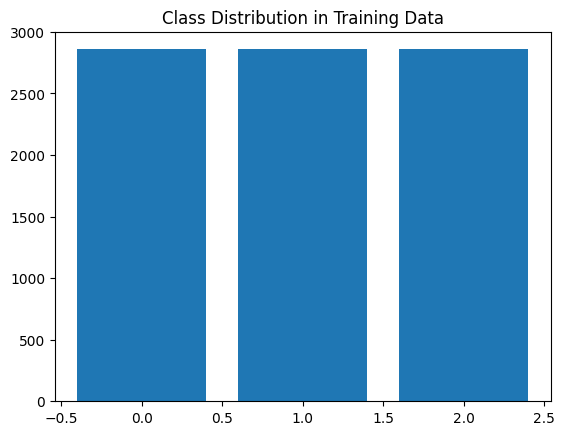

In [16]:
# Class Distribution in Training Data
counter = Counter(B)
for k, v in counter.items():
    print(f'Class={k}, n={v} ({v / len(B) * 100:.3f}%)')

plt.bar(counter.keys(), counter.values())
plt.title('Class Distribution in Training Data')
plt.show()




In [19]:
X_train_file['vec'] = X_train_file['tokens'].apply(sent_vec)
X_test_file['vec'] = X_test_file['tokens'].apply(sent_vec)



In [20]:
X_train = np.array(X_train_file['vec'].tolist())
y_train = np.array(X_train_file['label'].tolist())

X_test = np.array(X_test_file['vec'].tolist())
y_test = np.array(X_test_file['label'].tolist())




In [22]:
alg = [
    LogisticRegression(random_state=42),
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    MLPClassifier(hidden_layer_sizes=(50, 40), max_iter=300),
    SGDClassifier(),
    SVC(random_state=42),
    RandomForestClassifier(n_estimators=300, random_state=42),
    AdaBoostClassifier(n_estimators=300, random_state=42),
    XGBClassifier(n_estimators=300, random_state=42),
    LGBMClassifier(n_estimators=300, random_state=42),
    CatBoostClassifier(n_estimators=300, random_state=42, verbose=0)
]

name = [
    "LogisticRegression",
    "GaussianNB",
    "DecisionTree",
    "MLPClassifier",
    "SGD",
    "SVM",
    "RandomForest",
    "AdaBoost",
    "XGB",
    "LGBM",
    "CatBoost"
]



----------------- LogisticRegression ----------------------
===== Train LogisticRegression =====
Precision: 0.76984670
Recall: 0.77124869
Accuracy: 0.77124869
F1 Score: 0.77017536


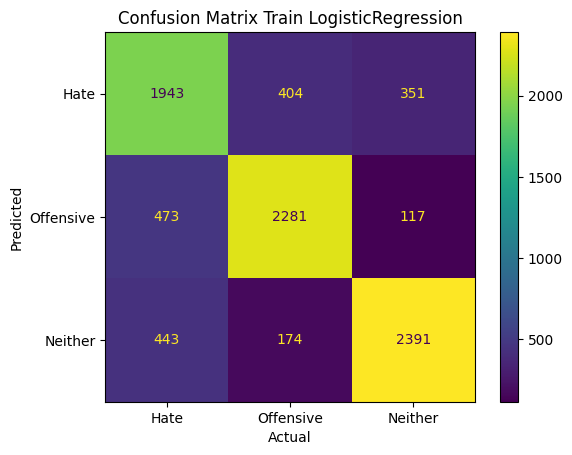

              precision    recall  f1-score   support

        Hate     0.7202    0.6796    0.6993      2859
   Offensive     0.7945    0.7978    0.7962      2859
     Neither     0.7949    0.8363    0.8151      2859

    accuracy                         0.7712      8577
   macro avg     0.7698    0.7712    0.7702      8577
weighted avg     0.7698    0.7712    0.7702      8577

===== Test LogisticRegression =====
Precision: 0.61312334
Recall: 0.73169440
Accuracy: 0.77632077
F1 Score: 0.63032397


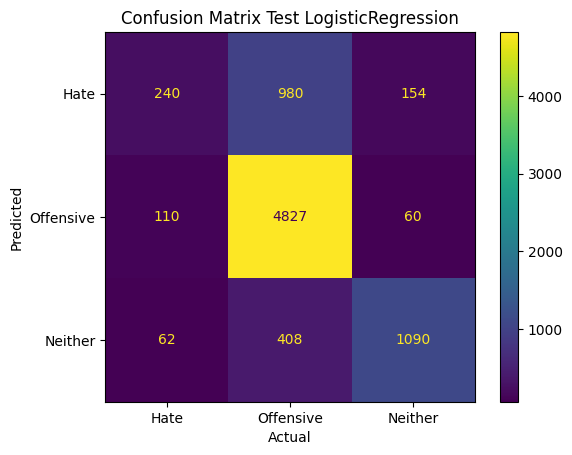

              precision    recall  f1-score   support

        Hate     0.1747    0.5825    0.2688       412
   Offensive     0.9660    0.7767    0.8610      6215
     Neither     0.6987    0.8359    0.7612      1304

    accuracy                         0.7763      7931
   macro avg     0.6131    0.7317    0.6303      7931
weighted avg     0.8809    0.7763    0.8139      7931

----------------- GaussianNB ----------------------
===== Train GaussianNB =====
Precision: 0.67993811
Recall: 0.68602075
Accuracy: 0.68602075
F1 Score: 0.68054675


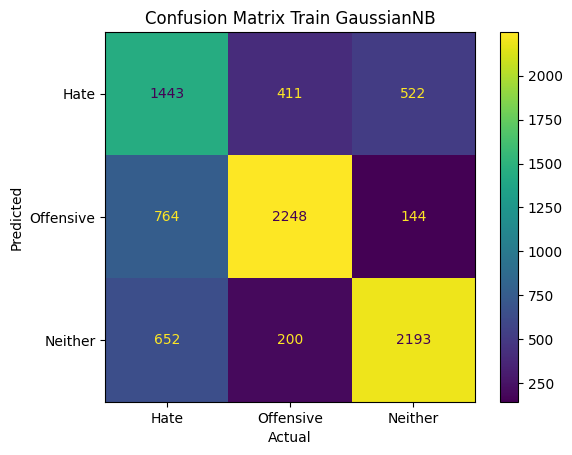

              precision    recall  f1-score   support

        Hate     0.6073    0.5047    0.5513      2859
   Offensive     0.7123    0.7863    0.7475      2859
     Neither     0.7202    0.7671    0.7429      2859

    accuracy                         0.6860      8577
   macro avg     0.6799    0.6860    0.6805      8577
weighted avg     0.6799    0.6860    0.6805      8577

===== Test GaussianNB =====
Precision: 0.58377034
Recall: 0.66090123
Accuracy: 0.76119027
F1 Score: 0.59188168


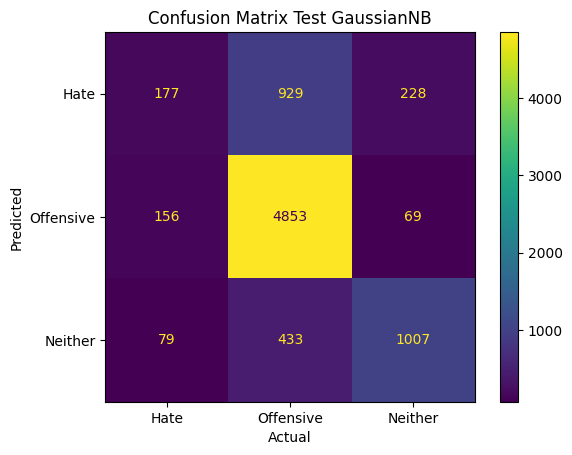

              precision    recall  f1-score   support

        Hate     0.1327    0.4296    0.2027       412
   Offensive     0.9557    0.7809    0.8595      6215
     Neither     0.6629    0.7722    0.7134      1304

    accuracy                         0.7612      7931
   macro avg     0.5838    0.6609    0.5919      7931
weighted avg     0.8648    0.7612    0.8013      7931

----------------- DecisionTree ----------------------
===== Train DecisionTree =====
Precision: 0.99639140
Recall: 0.99638568
Accuracy: 0.99638568
F1 Score: 0.99638616


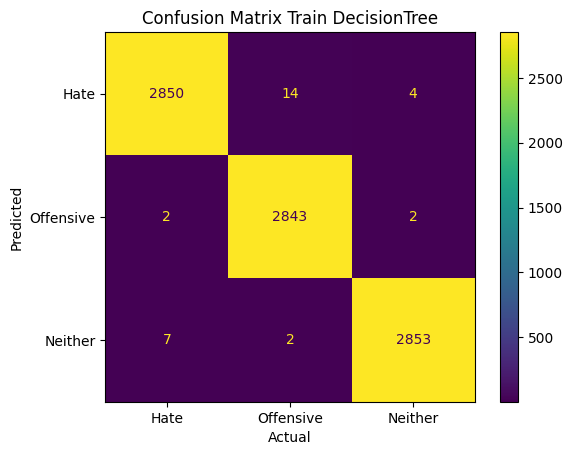

              precision    recall  f1-score   support

        Hate     0.9937    0.9969    0.9953      2859
   Offensive     0.9986    0.9944    0.9965      2859
     Neither     0.9969    0.9979    0.9974      2859

    accuracy                         0.9964      8577
   macro avg     0.9964    0.9964    0.9964      8577
weighted avg     0.9964    0.9964    0.9964      8577

===== Test DecisionTree =====
Precision: 0.50390287
Recall: 0.57129964
Accuracy: 0.60711134
F1 Score: 0.48134786


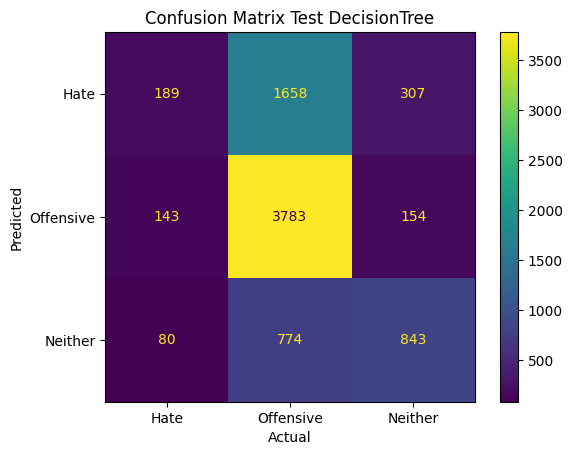

              precision    recall  f1-score   support

        Hate     0.0877    0.4587    0.1473       412
   Offensive     0.9272    0.6087    0.7349      6215
     Neither     0.4968    0.6465    0.5618      1304

    accuracy                         0.6071      7931
   macro avg     0.5039    0.5713    0.4813      7931
weighted avg     0.8128    0.6071    0.6759      7931

----------------- MLPClassifier ----------------------
===== Train MLPClassifier =====
Precision: 0.99475764
Recall: 0.99475341
Accuracy: 0.99475341
F1 Score: 0.99475254


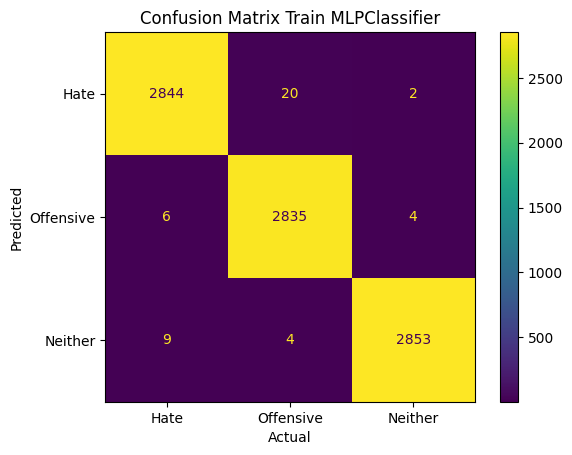

              precision    recall  f1-score   support

        Hate     0.9923    0.9948    0.9935      2859
   Offensive     0.9965    0.9916    0.9940      2859
     Neither     0.9955    0.9979    0.9967      2859

    accuracy                         0.9948      8577
   macro avg     0.9948    0.9948    0.9948      8577
weighted avg     0.9948    0.9948    0.9948      8577

===== Test MLPClassifier =====
Precision: 0.59026105
Recall: 0.69341346
Accuracy: 0.72248140
F1 Score: 0.59067722


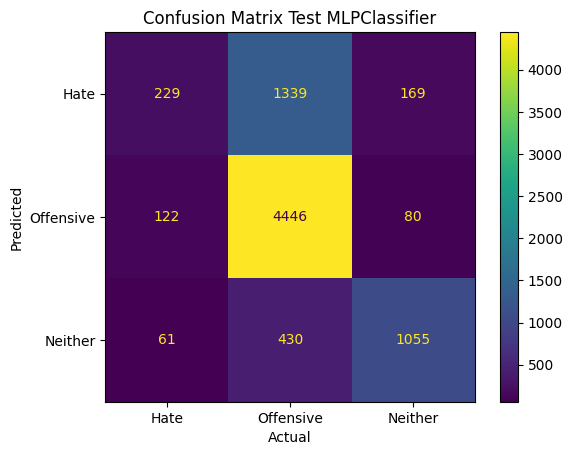

              precision    recall  f1-score   support

        Hate     0.1318    0.5558    0.2131       412
   Offensive     0.9565    0.7154    0.8186      6215
     Neither     0.6824    0.8090    0.7404      1304

    accuracy                         0.7225      7931
   macro avg     0.5903    0.6934    0.5907      7931
weighted avg     0.8686    0.7225    0.7742      7931

----------------- SGD ----------------------
===== Train SGD =====
Precision: 0.76843164
Recall: 0.76495278
Accuracy: 0.76495278
F1 Score: 0.75974743


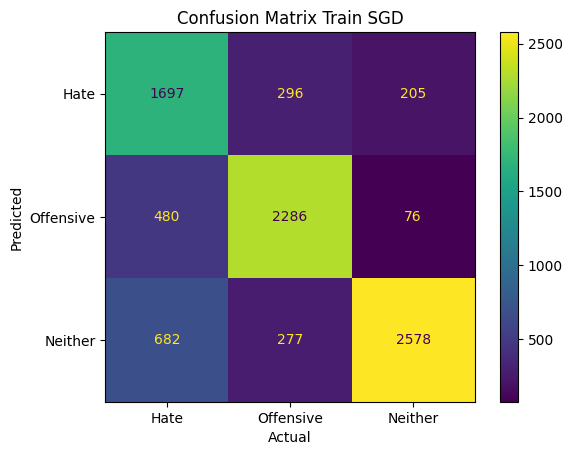

              precision    recall  f1-score   support

        Hate     0.7721    0.5936    0.6711      2859
   Offensive     0.8044    0.7996    0.8020      2859
     Neither     0.7289    0.9017    0.8061      2859

    accuracy                         0.7650      8577
   macro avg     0.7684    0.7650    0.7597      8577
weighted avg     0.7684    0.7650    0.7597      8577

===== Test SGD =====
Precision: 0.59990690
Recall: 0.73031684
Accuracy: 0.79132518
F1 Score: 0.63332982


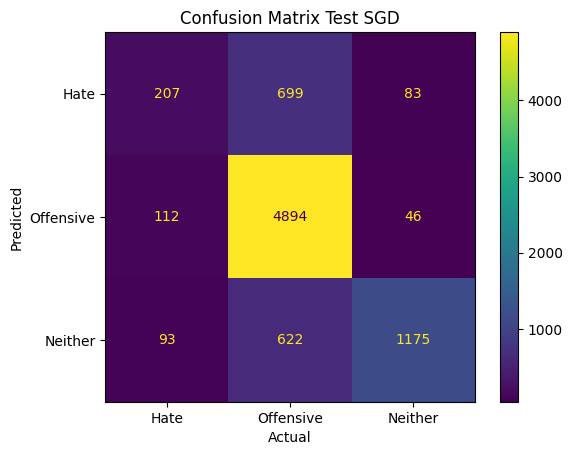

              precision    recall  f1-score   support

        Hate     0.2093    0.5024    0.2955       412
   Offensive     0.9687    0.7874    0.8687      6215
     Neither     0.6217    0.9011    0.7358      1304

    accuracy                         0.7913      7931
   macro avg     0.5999    0.7303    0.6333      7931
weighted avg     0.8722    0.7913    0.8171      7931

----------------- SVM ----------------------
===== Train SVM =====
Precision: 0.80598514
Recall: 0.80727527
Accuracy: 0.80727527
F1 Score: 0.80617687


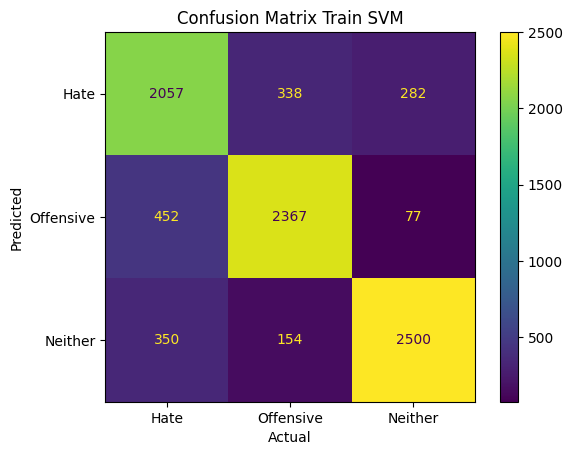

              precision    recall  f1-score   support

        Hate     0.7684    0.7195    0.7431      2859
   Offensive     0.8173    0.8279    0.8226      2859
     Neither     0.8322    0.8744    0.8528      2859

    accuracy                         0.8073      8577
   macro avg     0.8060    0.8073    0.8062      8577
weighted avg     0.8060    0.8073    0.8062      8577

===== Test SVM =====
Precision: 0.62523004
Recall: 0.74492857
Accuracy: 0.80229479
F1 Score: 0.65030826


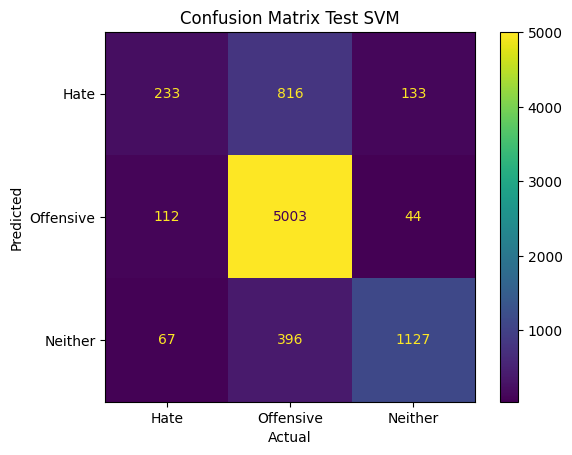

              precision    recall  f1-score   support

        Hate     0.1971    0.5655    0.2923       412
   Offensive     0.9698    0.8050    0.8797      6215
     Neither     0.7088    0.8643    0.7789      1304

    accuracy                         0.8023      7931
   macro avg     0.6252    0.7449    0.6503      7931
weighted avg     0.8867    0.8023    0.8326      7931

----------------- RandomForest ----------------------
===== Train RandomForest =====
Precision: 0.99638652
Recall: 0.99638568
Accuracy: 0.99638568
F1 Score: 0.99638486


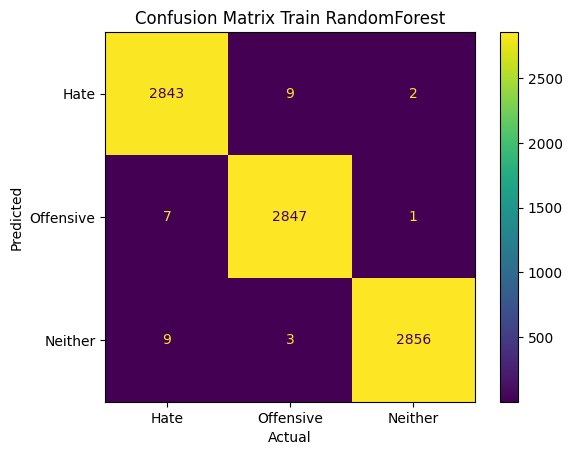

              precision    recall  f1-score   support

        Hate     0.9961    0.9944    0.9953      2859
   Offensive     0.9972    0.9958    0.9965      2859
     Neither     0.9958    0.9990    0.9974      2859

    accuracy                         0.9964      8577
   macro avg     0.9964    0.9964    0.9964      8577
weighted avg     0.9964    0.9964    0.9964      8577

===== Test RandomForest =====
Precision: 0.60225958
Recall: 0.71554540
Accuracy: 0.78426428
F1 Score: 0.62605010


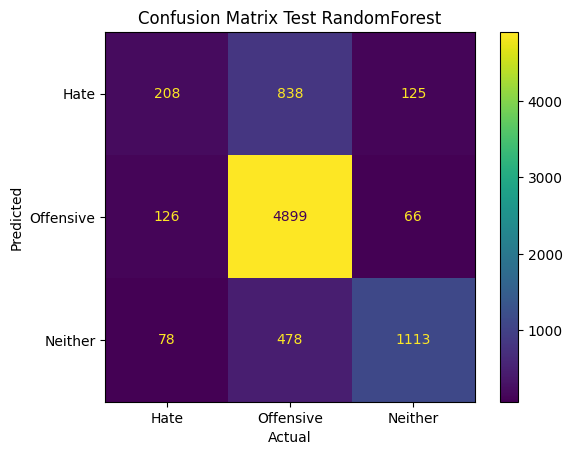

              precision    recall  f1-score   support

        Hate     0.1776    0.5049    0.2628       412
   Offensive     0.9623    0.7883    0.8666      6215
     Neither     0.6669    0.8535    0.7487      1304

    accuracy                         0.7843      7931
   macro avg     0.6023    0.7155    0.6261      7931
weighted avg     0.8730    0.7843    0.8159      7931

----------------- AdaBoost ----------------------
===== Train AdaBoost =====
Precision: 0.72953855
Recall: 0.73254052
Accuracy: 0.73254052
F1 Score: 0.73036741


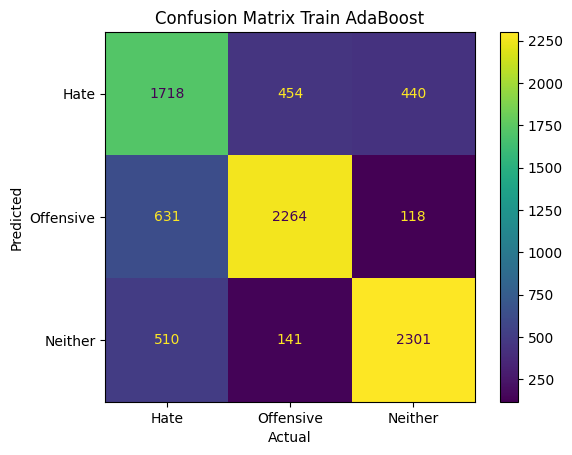

              precision    recall  f1-score   support

        Hate     0.6577    0.6009    0.6280      2859
   Offensive     0.7514    0.7919    0.7711      2859
     Neither     0.7795    0.8048    0.7919      2859

    accuracy                         0.7325      8577
   macro avg     0.7295    0.7325    0.7304      8577
weighted avg     0.7295    0.7325    0.7304      8577

===== Test AdaBoost =====
Precision: 0.59548197
Recall: 0.67998218
Accuracy: 0.75677720
F1 Score: 0.60029392


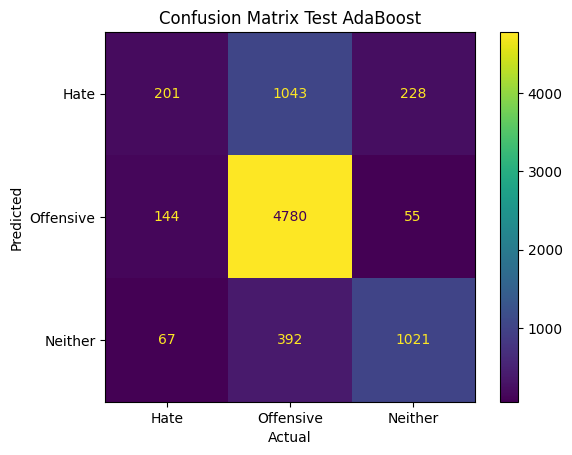

              precision    recall  f1-score   support

        Hate     0.1365    0.4879    0.2134       412
   Offensive     0.9600    0.7691    0.8540      6215
     Neither     0.6899    0.7830    0.7335      1304

    accuracy                         0.7568      7931
   macro avg     0.5955    0.6800    0.6003      7931
weighted avg     0.8728    0.7568    0.8009      7931

----------------- XGB ----------------------
===== Train XGB =====
Precision: 0.99638759
Recall: 0.99638568
Accuracy: 0.99638568
F1 Score: 0.99638564


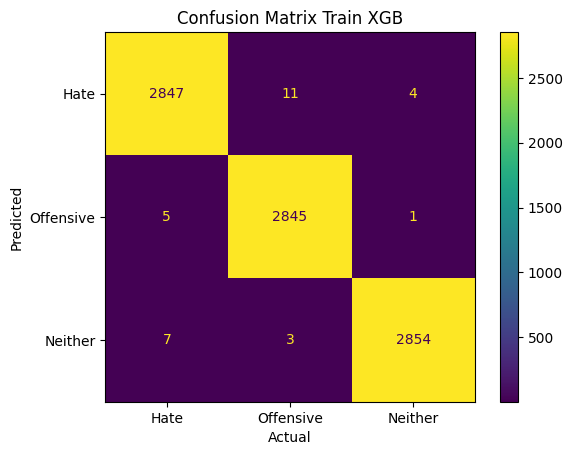

              precision    recall  f1-score   support

        Hate     0.9948    0.9958    0.9953      2859
   Offensive     0.9979    0.9951    0.9965      2859
     Neither     0.9965    0.9983    0.9974      2859

    accuracy                         0.9964      8577
   macro avg     0.9964    0.9964    0.9964      8577
weighted avg     0.9964    0.9964    0.9964      8577

===== Test XGB =====
Precision: 0.62076772
Recall: 0.74268272
Accuracy: 0.79548607
F1 Score: 0.64535550


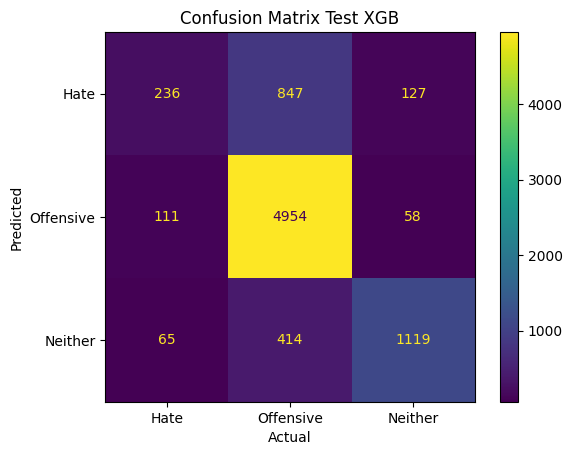

              precision    recall  f1-score   support

        Hate     0.1950    0.5728    0.2910       412
   Offensive     0.9670    0.7971    0.8739      6215
     Neither     0.7003    0.8581    0.7712      1304

    accuracy                         0.7955      7931
   macro avg     0.6208    0.7427    0.6454      7931
weighted avg     0.8830    0.7955    0.8267      7931

----------------- LGBM ----------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 8577, number of used features: 100
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
===== Train LGBM =====
Precision: 0.99638742
Recall: 0.99638568
Accuracy: 0.99638568
F1 Score: 0.99638539


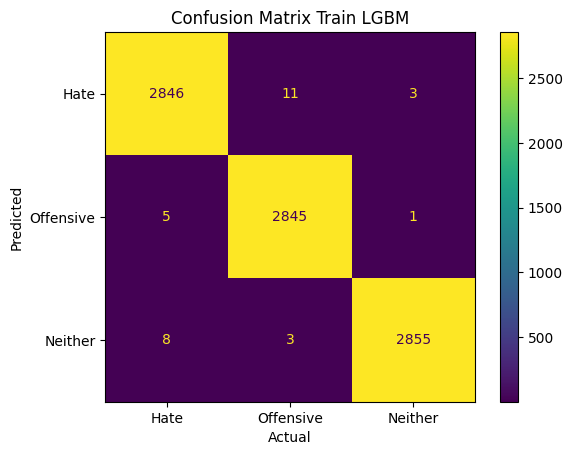

              precision    recall  f1-score   support

        Hate     0.9951    0.9955    0.9953      2859
   Offensive     0.9979    0.9951    0.9965      2859
     Neither     0.9962    0.9986    0.9974      2859

    accuracy                         0.9964      8577
   macro avg     0.9964    0.9964    0.9964      8577
weighted avg     0.9964    0.9964    0.9964      8577

===== Test LGBM =====
Precision: 0.61959349
Recall: 0.73913721
Accuracy: 0.79472954
F1 Score: 0.64377821


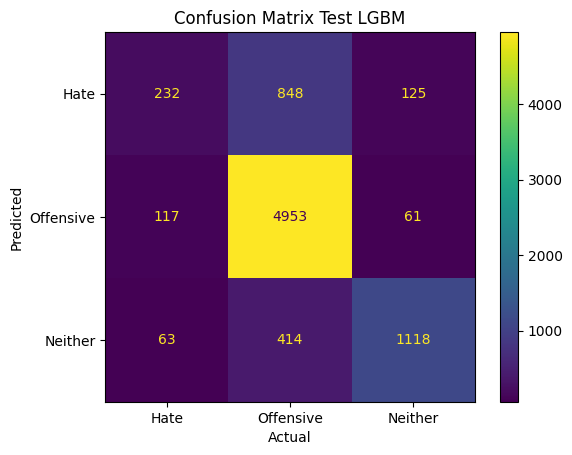

              precision    recall  f1-score   support

        Hate     0.1925    0.5631    0.2870       412
   Offensive     0.9653    0.7969    0.8731      6215
     Neither     0.7009    0.8574    0.7713      1304

    accuracy                         0.7947      7931
   macro avg     0.6196    0.7391    0.6438      7931
weighted avg     0.8817    0.7947    0.8259      7931

----------------- CatBoost ----------------------
===== Train CatBoost =====
Precision: 0.97177645
Recall: 0.97178501
Accuracy: 0.97178501
F1 Score: 0.97176306


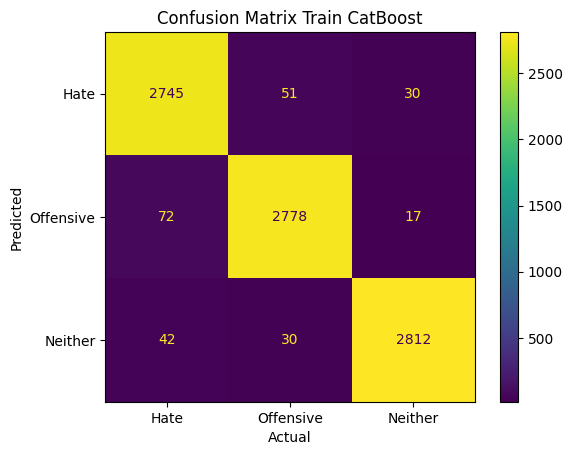

              precision    recall  f1-score   support

        Hate     0.9713    0.9601    0.9657      2859
   Offensive     0.9690    0.9717    0.9703      2859
     Neither     0.9750    0.9836    0.9793      2859

    accuracy                         0.9718      8577
   macro avg     0.9718    0.9718    0.9718      8577
weighted avg     0.9718    0.9718    0.9718      8577

===== Test CatBoost =====
Precision: 0.61477477
Recall: 0.72847769
Accuracy: 0.78804690
F1 Score: 0.63534595


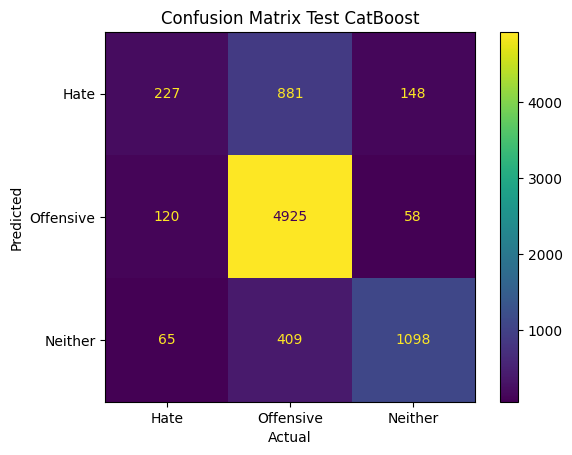

              precision    recall  f1-score   support

        Hate     0.1807    0.5510    0.2722       412
   Offensive     0.9651    0.7924    0.8703      6215
     Neither     0.6985    0.8420    0.7636      1304

    accuracy                         0.7880      7931
   macro avg     0.6148    0.7285    0.6353      7931
weighted avg     0.8805    0.7880    0.8217      7931

                 Model  Precision    Recall  F1 Score  Accuracy
0   LogisticRegression   0.613123  0.731694  0.630324  0.776321
1           GaussianNB   0.583770  0.660901  0.591882  0.761190
2         DecisionTree   0.503903  0.571300  0.481348  0.607111
3        MLPClassifier   0.590261  0.693413  0.590677  0.722481
4                  SGD   0.599907  0.730317  0.633330  0.791325
5                  SVM   0.625230  0.744929  0.650308  0.802295
6         RandomForest   0.602260  0.715545  0.626050  0.784264
7             AdaBoost   0.595482  0.679982  0.600294  0.756777
8                  XGB   0.620768  0.742683

In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# تابع نمایش ماتریس درهم‌ریختگی و محاسبه معیارهای ارزیابی
def show_confusion(pred_label, label, nm):
    class_names = ['Hate', 'Offensive', 'Neither']
    cm = confusion_matrix(label, pred_label, labels=[0, 1, 2])  # Specify labels to ensure order

    # نمایش ماتریس درهم‌ریختگی
    disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
    disp.plot()
    plt.title(f'Confusion Matrix {nm}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# تابع ارزیابی مدل
def evaluate_model(model, X_data, y_data, nm):
    # پیش‌بینی برای داده‌های ورودی
    predictions = model.predict(X_data)

    # محاسبه معیارهای کلی
    precision = precision_score(y_data, predictions, average='macro')
    recall = recall_score(y_data, predictions, average='macro')
    accuracy = accuracy_score(y_data, predictions)
    f1 = f1_score(y_data, predictions, average='macro')

    # چاپ معیارها
    print(f"===== {nm} =====")
    print(f"Precision: {precision:.8f}")
    print(f"Recall: {recall:.8f}")
    print(f"Accuracy: {accuracy:.8f}")
    print(f"F1 Score: {f1:.8f}")

    # نمایش ماتریس درهم‌ریختگی
    show_confusion(y_data, predictions, nm)

    # چاپ گزارش کامل
    print(classification_report(y_data, predictions, target_names=['Hate', 'Offensive', 'Neither'], digits=4))

    # بازگرداندن معیارها برای استفاده در DataFrame
    return precision, recall, accuracy, f1

# ایجاد یک DataFrame خالی برای ذخیره نتایج
results_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy'])

# برای هر مدل اجرا کنید
for model, model_name in zip(alg, name):
    print(f'----------------- {model_name} ----------------------')

    # آموزش مدل با داده‌های آموزش
    model.fit(X_train, y_train)

    # ارزیابی روی داده‌های آموزش
    train_precision, train_recall, train_accuracy, train_f1 = evaluate_model(model, X_train, y_train, 'Train ' + model_name)

    # ارزیابی روی داده‌های تست
    test_precision, test_recall, test_accuracy, test_f1 = evaluate_model(model, X_test, y_test, 'Test ' + model_name)

    # اضافه کردن اطلاعات به DataFrame
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Precision': [test_precision],
        'Recall': [test_recall],
        'F1 Score': [test_f1],
        'Accuracy': [test_accuracy]
    })

    results_df = pd.concat([results_df, new_row], ignore_index=True)

# نمایش جدول نتایج
print(results_df)
